In [216]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.data_wrangling as data
import functions.eddy_feedback as ef

import warnings
warnings.filterwarnings('ignore', category=xr.SerializationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

### CESM2

Completed.

In [217]:
# cesm2_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/CESM2/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# cesm2_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/CESM2/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')

CESM2 DJF Feedback: 0.3978
CESM2 JAS Feedback: 0.3548


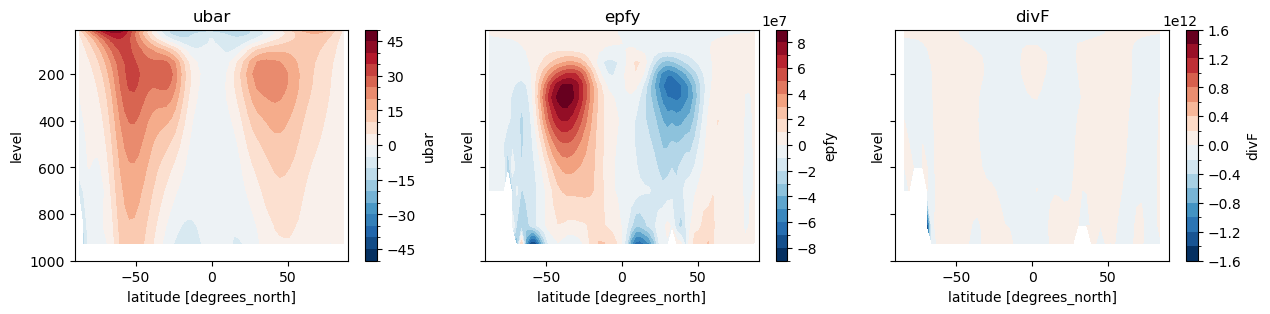

In [218]:
cesm2 = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/CESM2*.nc',
                          parallel=True, chunks={'time':12, 'ens_ax':50})

# REMOVE HUGE VALUES
cesm2['epfy'] = cesm2.epfy.where( abs(cesm2.epfy) < 1e10 )
# cesm2['divF'] = cesm2.divF.where( abs(cesm2.divF) > 1e-7 )

# calculate EFP
cesm2_efp_south = ef.calculate_efp_pamip(cesm2, calc_south_hemis=True)
cesm2_efp = ef.calculate_efp_pamip(cesm2)
model_cesm2='CESM2'
print(f'{model_cesm2} DJF Feedback: {cesm2_efp}')
print(f'{model_cesm2} JAS Feedback: {cesm2_efp_south}')

# plot original variables
cesm2 = cesm2.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,3))
cesm2.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
cesm2.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
cesm2.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### CanESM5

Completed.

In [219]:
# can_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/CanESM5/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# can_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/CanESM5/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# can_epfy

CanESM5 DJF Feedback: 0.4255
CanESM5 JAS Feedback: 0.4634


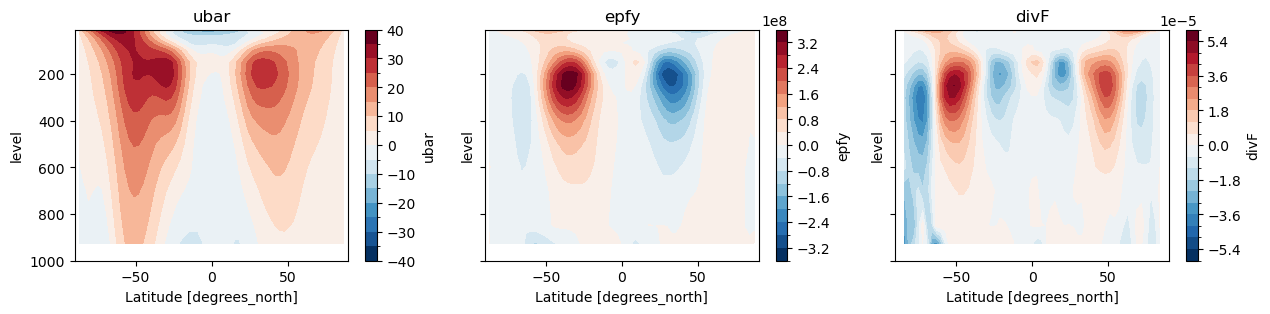

In [220]:
can = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/CanESM*.nc',
                          parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
can_efp_south = ef.calculate_efp_pamip(can, calc_south_hemis=True)
can_efp = ef.calculate_efp_pamip(can)
model_can='CanESM5'
print(f'{model_can} DJF Feedback: {can_efp}')
print(f'{model_can} JAS Feedback: {can_efp_south}')

# plot original variables
can = can.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,3))
can.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
can.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
can.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### CNRM-CM6-1

Completed.

In [221]:
# cnrm_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/CNRM-CM6-1/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# cnrm_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/CNRM-CM6-1/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')

CNRM-CM6-1 DJF Feedback: 0.2733
CNRM-CM6-1 JAS Feedback: 0.2386


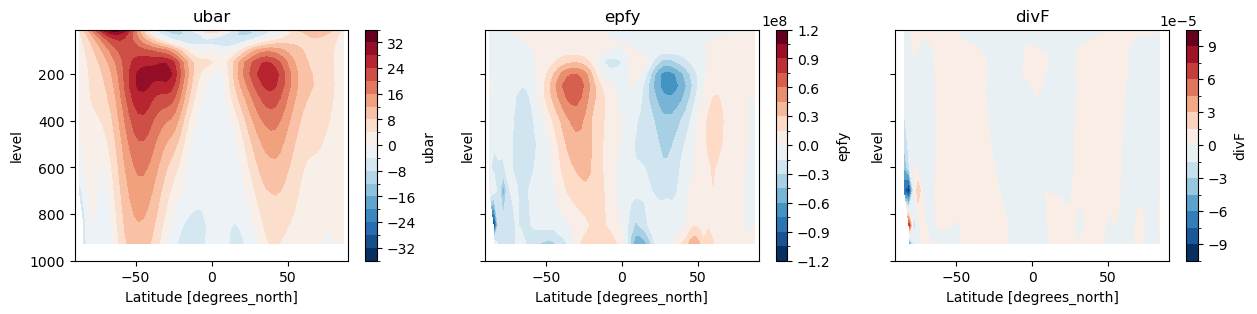

In [222]:
cnrm = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/CNRM-CM6-1*.nc',
                          parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
cnrm_efp_south = ef.calculate_efp_pamip(cnrm, calc_south_hemis=True)
cnrm_efp = ef.calculate_efp_pamip(cnrm)
model_cnrm='CNRM-CM6-1'
print(f'{model_cnrm} DJF Feedback: {cnrm_efp}')
print(f'{model_cnrm} JAS Feedback: {cnrm_efp_south}')

# plot original variables
cnrm = cnrm.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,3))
cnrm.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
cnrm.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
cnrm.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### E3SMv1

- epfy not on MASS

In [223]:
# e3sm_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/E3SMv1/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# e3sm_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/E3SMv1/*.nc',
#                             parallel=True)
# e3sm_ua.attrs = {}
# e3sm_ua

### EC-EARTH3

Completed.

In [224]:
# ecearth_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/EC-EARTH3/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# ecearth_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/EC-EARTH3/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# ecearth_epfy

EC-EARTH3 DJF Feedback: 0.3365
EC-EARTH3 JAS Feedback: 0.348


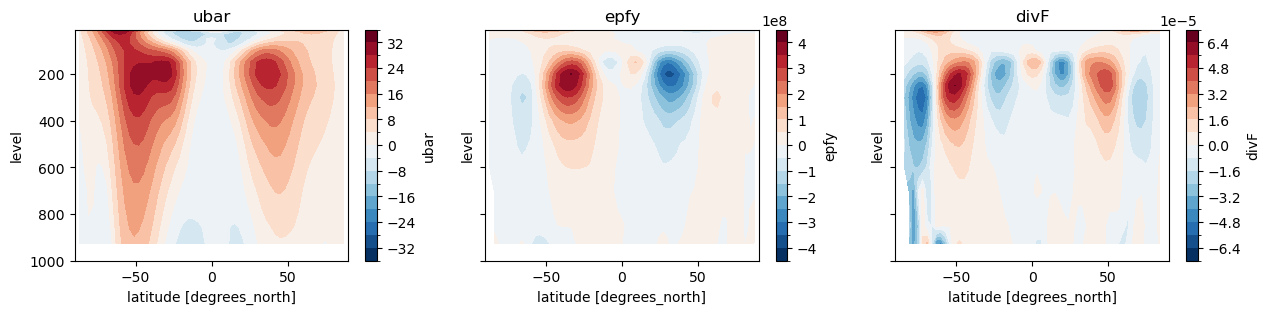

In [225]:
ecearth = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/EC-EARTH*.nc',
                          parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
ecearth_efp_south = ef.calculate_efp_pamip(ecearth, calc_south_hemis=True)
ecearth_efp = ef.calculate_efp_pamip(ecearth)
model_ecearth='EC-EARTH3'
print(f'{model_ecearth} DJF Feedback: {ecearth_efp}')
print(f'{model_ecearth} JAS Feedback: {ecearth_efp_south}')

# plot original variables
ecearth = ecearth.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,3))
ecearth.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
ecearth.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
ecearth.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### ECHAM6.3_AWI

- Rosie and Hao's members don't match up

In [226]:
# awi_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/ECHAM6.3_AWI/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# # ecearth_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/ECHAM6.3_AWI/*.nc',
# #                             parallel=True, combine='nested', concat_dim='ens_ax')
# awi_epfy.attrs = {}
# awi_epfy

In [227]:
# awi_ua

### FGOALS-f3-L

Completed.

In [228]:
# fgoals_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/FGOALS-f3-L/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# fgoals_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/FGOALS-f3-L/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# fgoals_epfy

FGOALS-f3-L DJF Feedback: 0.2621
FGOALS-f3-L JAS Feedback: 0.142


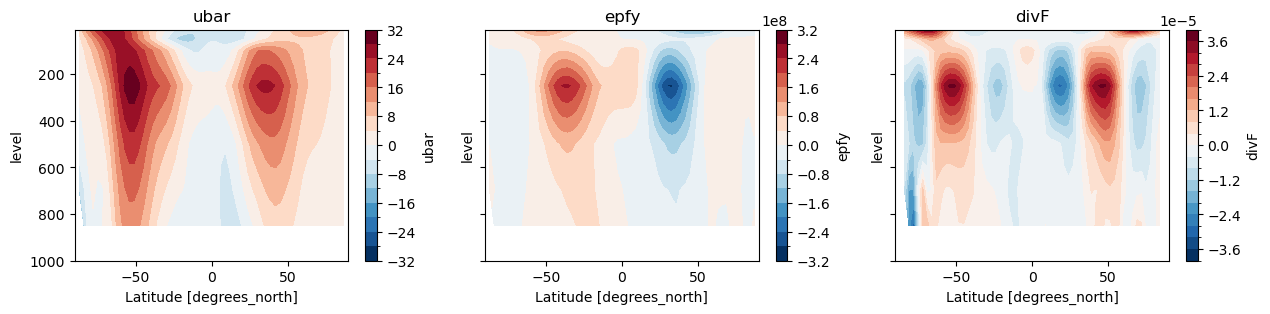

In [229]:
fgoals = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/FGOALS-f3-L*.nc',
                          parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
fgoals_efp_south = ef.calculate_efp_pamip(fgoals, calc_south_hemis=True)
fgoals_efp = ef.calculate_efp_pamip(fgoals)
model_fgoals='FGOALS-f3-L'
print(f'{model_fgoals} DJF Feedback: {fgoals_efp}')
print(f'{model_fgoals} JAS Feedback: {fgoals_efp_south}')

# plot original variables
fgoals = fgoals.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,3))
fgoals.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
fgoals.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
fgoals.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### HadGEM3-GC31-LL

Completed.

In [254]:
# hadll_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/HadGEM3-GC31-LL/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# hadll_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/HadGEM3-GC31-LL/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# hadll_epfy.attrs = {}
# hadll_epfy

HadGEM3-GC31-LL DJF Feedback: 0.3018
HadGEM3-GC31-LL JAS Feedback: 0.3276


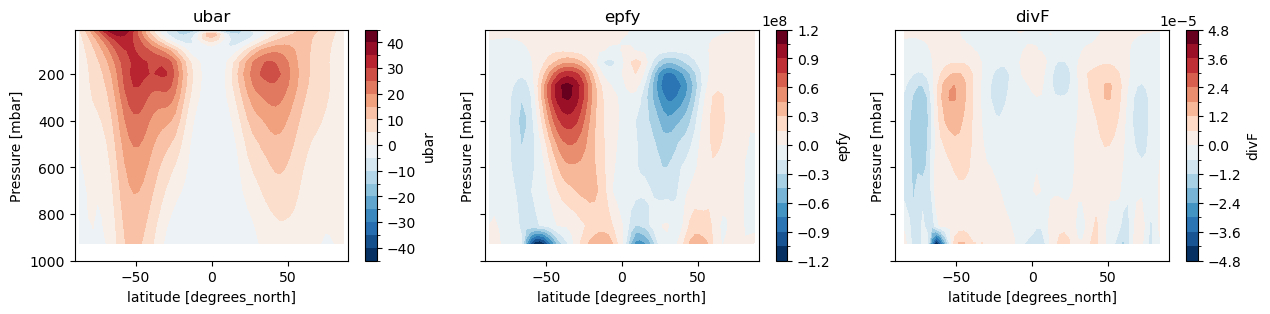

In [259]:
hadll = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/HadGEM3-GC31-LL*.nc',
                          parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
hadll_efp_south = ef.calculate_efp_pamip(hadll, calc_south_hemis=True)
hadll_efp = ef.calculate_efp_pamip(hadll)
model_hadll='HadGEM3-GC31-LL'
print(f'{model_hadll} DJF Feedback: {hadll_efp}')
print(f'{model_hadll} JAS Feedback: {hadll_efp_south}')

# plot original variables
hadll = hadll.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,3))
hadll.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
hadll.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
hadll.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### HadGEM3-GC31-MM

Completed.

In [253]:
# hadmm_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/HadGEM3-GC31-MM/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# hadmm_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/HadGEM3-GC31-MM/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# hadmm_epfy

HadGEM3-GC31-MM DJF Feedback: 0.3616
HadGEM3-GC31-MM JAS Feedback: 0.3474


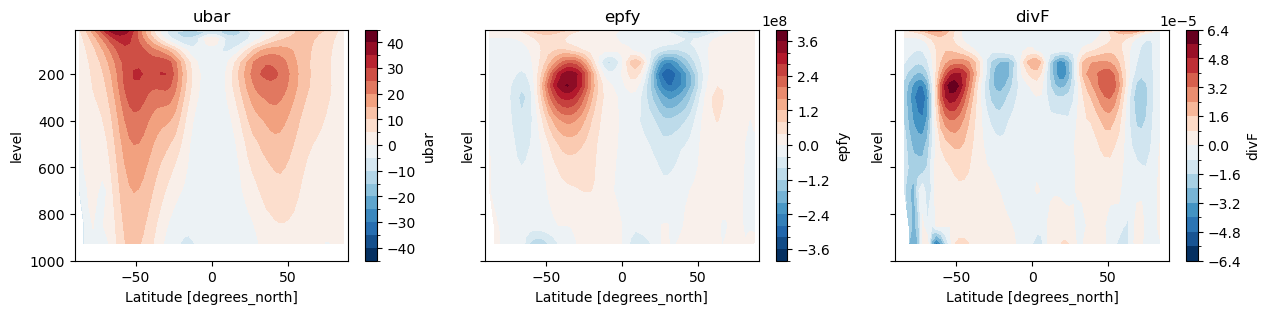

In [252]:
hadmm = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/HadGEM3-GC31-MM*.nc',
                          parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
hadmm_efp_south = ef.calculate_efp_pamip(hadmm, calc_south_hemis=True)
hadmm_efp = ef.calculate_efp_pamip(hadmm)
model_hadmm='HadGEM3-GC31-MM'
print(f'{model_hadmm} DJF Feedback: {hadmm_efp}')
print(f'{model_hadmm} JAS Feedback: {hadmm_efp_south}')

# plot original variables
hadmm = hadmm.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,3))
hadmm.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
hadmm.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
hadmm.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### IPSL-CM6A-LR

- SH doesn't match 0.22 vs 0.28
- One file for each var

Completed.

In [233]:
# ipsl_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/IPSL-CM6A-LR/*.nc',
#                               parallel=True, chunks={'time': 12})
# ipsl_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/IPSL-CM6A-LR/*.nc',
#                               parallel=True, chunks={'time': 12})
# ipsl_epfy['time'] = ipsl_ua.time
# ipsl_epfy.attrs = {}
# ipsl_epfy = ipsl_epfy.rename({'record': 'ens_ax'})
# ipsl_ua = ipsl_ua.rename({'plev': 'level', 'record': 'ens_ax'})
# ipsl_ua['level'] = ipsl_ua.level / 100

# # match pressure levels to smaller dataset
# if len(ipsl_epfy.level) > len(ipsl_ua.level):
#     ipsl_epfy = ipsl_epfy.sel( level = ipsl_ua.level.values )
# else:
#     ipsl_ua = ipsl_ua.sel( level = ipsl_epfy.level.values )
    
# # create dataset and slice to remove spin-up
# ipsl_ds = xr.Dataset( {'ubar': ipsl_ua.ua.mean('lon'), 'epfy': ipsl_epfy.epfy})
# ipsl_ds = ipsl_ds.interp(lat=np.arange(-90,93,3))
# ipsl_ds = ipsl_ds.sel(time=slice('2000-06', '2001-05'))

# # subset epfy to match SRIP datasets
# ipsl_ds = ipsl_ds.where(ipsl_ds.level < 1000.)
# ipsl_ds = ipsl_ds.where(ipsl_ds.level > 1.)
# ipsl_ds = ipsl_ds.where(ipsl_ds.lat > -90.)
# ipsl_ds = ipsl_ds.where(ipsl_ds.lat < 90)

# # calculate divF
# ipsl_ds = ef.calculate_divFphi(ipsl_ds)
# ipsl_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/IPSL-CM6A-LR_ua_epfy_divF_r200_3x3.nc')
# ipsl_ds

IPSL-CM6A-LR DJF Feedback: 0.3034
IPSL-CM6A-LR JAS Feedback: 0.2895


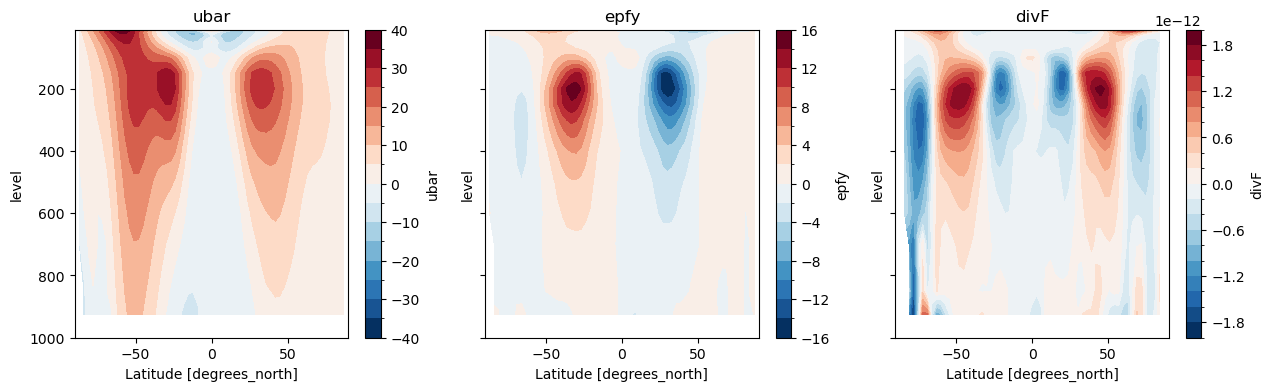

In [234]:
ipsl_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/IPSL-CM6A-LR*',
                            parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
ipsl_efp = ef.calculate_efp_pamip(ipsl_ds)
ipsl_efp_south = ef.calculate_efp_pamip(ipsl_ds, calc_south_hemis=True)
model_ipsl='IPSL-CM6A-LR'
print(f'{model_ipsl} DJF Feedback: {ipsl_efp}')
print(f'{model_ipsl} JAS Feedback: {ipsl_efp_south}')

# plot original variables
ipsl = ipsl_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,4))
ipsl.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
ipsl.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
ipsl.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### MIROC6

Completed.

In [235]:
# miroc_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/MIROC6/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# miroc_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/MIROC6/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# miroc_epfy

MIROC6 DJF Feedback: 0.2469
MIROC6 JAS Feedback: 0.3547


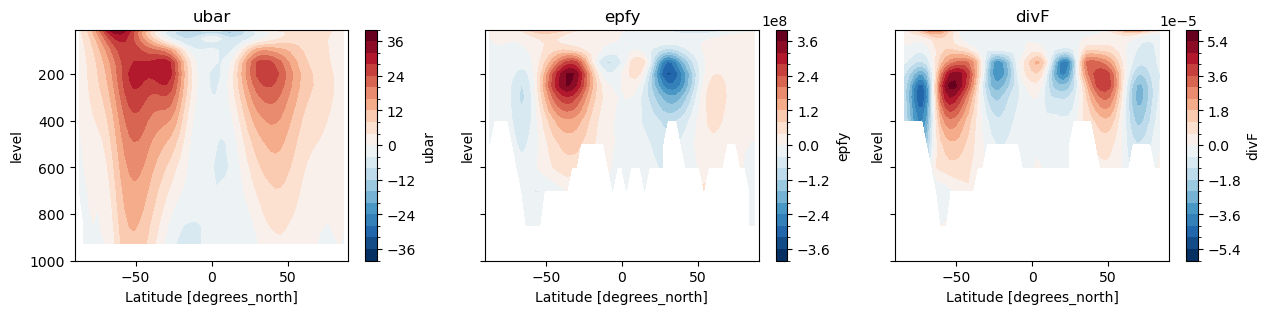

In [236]:
miroc = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/MIROC6*.nc',
                          parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
miroc_efp_south = ef.calculate_efp_pamip(miroc, calc_south_hemis=True)
miroc_efp = ef.calculate_efp_pamip(miroc)
model_miroc='MIROC6'
print(f'{model_miroc} DJF Feedback: {miroc_efp}')
print(f'{model_miroc} JAS Feedback: {miroc_efp_south}')

# plot original variables
miroc = miroc.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,3))
miroc.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
miroc.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
miroc.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### NorESM2-LM

Completed.

In [237]:
# nor_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/NorESM2-LM/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# nor_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/NorESM2-LM/*.nc',
#                             parallel=True, combine='nested', concat_dim='ens_ax')
# nor_epfy

NorESM2-LM DJF Feedback: 0.3354
NorESM2-LM JAS Feedback: 0.3837


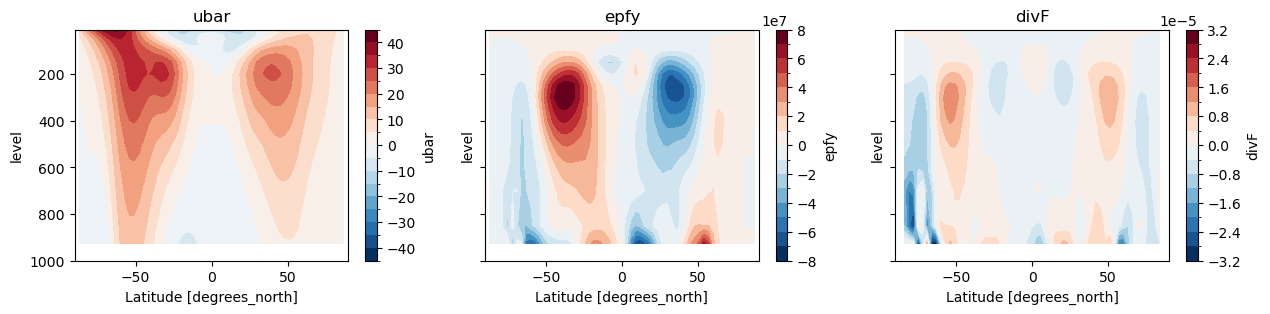

In [238]:
nor = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/NorESM2-LM*.nc',
                          parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
nor_efp_south = ef.calculate_efp_pamip(nor, calc_south_hemis=True)
nor_efp = ef.calculate_efp_pamip(nor)
model_nor='NorESM2-LM'
print(f'{model_nor} DJF Feedback: {nor_efp}')
print(f'{model_nor} JAS Feedback: {nor_efp_south}')

# plot original variables
nor = nor.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,3))
nor.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
nor.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
nor.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### OpenIFS-159

- Slightly different results

Completed.

In [239]:
# t159_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/OpenIFS-159/temnwa*.nc',
#                          combine='nested', concat_dim='ens_ax', parallel=True)
# t159_ds = t159_ds[['ua', 'epfy']].mean('lon')
# t159_ds = t159_ds.rename({'plev': 'level', 'ua':'ubar'})
# t159_ds['level'] = t159_ds['level'] / 100

# # create dataset and slice to remove spin-up
# t159_ds = t159_ds.interp(lat=np.arange(-90,93,3))
# t159_ds = t159_ds.sel(time=slice('2000-06', '2001-05'))

# # subset epfy to match SRIP datasets
# t159_ds = t159_ds.where(t159_ds.level < 1000.)
# t159_ds = t159_ds.where(t159_ds.level > 1.)
# t159_ds = t159_ds.where(t159_ds.lat > -90.)
# t159_ds = t159_ds.where(t159_ds.lat < 90)

# # calculate divF
# t159_ds = ef.calculate_divFphi(t159_ds)
# # t159_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/OpenIFS-T159_ua_epfy_divF_r300_3x3.nc')
# t159_ds

OpenIFS-159 DJF Feedback: 0.3226
OpenIFS-159 JAS Feedback: 0.3724


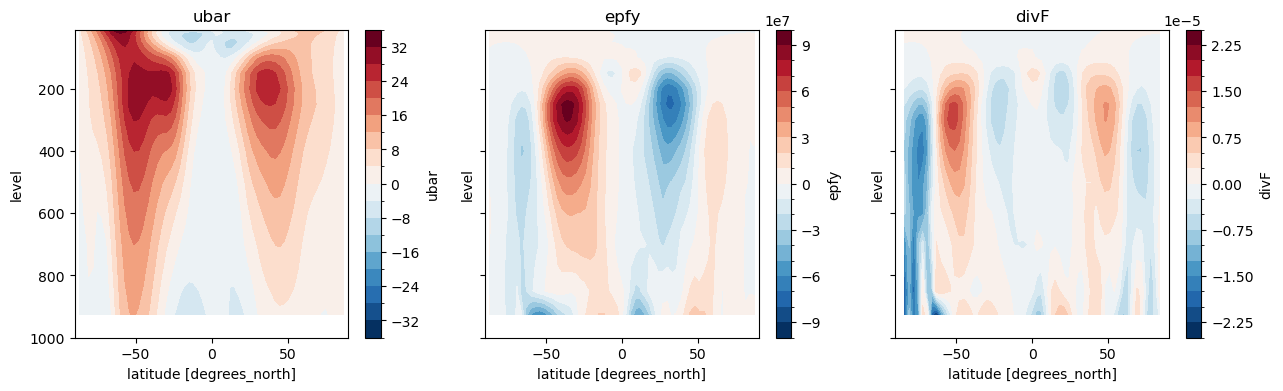

In [240]:
t159_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/OpenIFS-T159*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})

t159_efp = ef.calculate_efp_pamip(t159_ds)
t159_efp_south = ef.calculate_efp_pamip(t159_ds, calc_south_hemis=True)
model_t159='OpenIFS-159'
print(f'{model_t159} DJF Feedback: {t159_efp}')
print(f'{model_t159} JAS Feedback: {t159_efp_south}')

# plot original variables
t159 = t159_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,4))
t159.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
t159.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
t159.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### OpenIFS-511

- NH differs 0.27 vs 0.37

Completed.

In [241]:
# t511_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/OpenIFS-511/temnwa*.nc',
#                          combine='nested', concat_dim='ens_ax', parallel=True)

# t511_ds = t511_ds[['ua', 'epfy']].mean('lon')
# t511_ds = t511_ds.rename({'plev': 'level', 'ua':'ubar'})
# t511_ds['level'] = t511_ds['level'] / 100

# # create dataset and slice to remove spin-up
# t511_ds = t511_ds.interp(lat=np.arange(-90,93,3))
# t511_ds = t511_ds.sel(time=slice('2000-06', '2001-05'))

# # subset epfy to match SRIP datasets
# t511_ds = t511_ds.where(t511_ds.level < 1000.)
# t511_ds = t511_ds.where(t511_ds.level > 1.)
# t511_ds = t511_ds.where(t511_ds.lat > -90.)
# t511_ds = t511_ds.where(t511_ds.lat < 90)

# # # calculate divF
# t511_ds = ef.calculate_divFphi(t511_ds)
# t511_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/OpenIFS-511_ua_epfy_divF_r100_3x3_futArc.nc')
# t511_ds

OpenIFS-511 DJF Feedback: 0.3712
OpenIFS-511 JAS Feedback: 0.3392


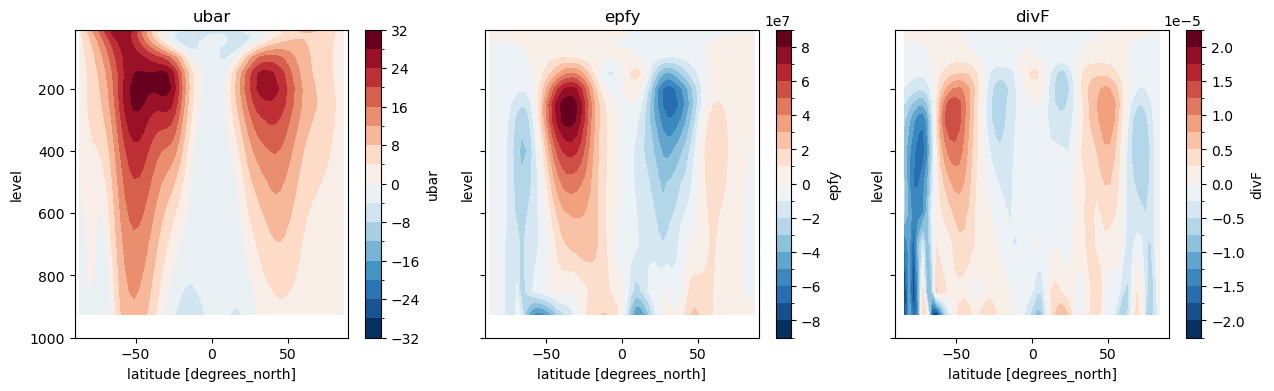

In [242]:
t511_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.6_pdSST-futArcSIC/OpenIFS-511*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})

t511_efp = ef.calculate_efp_pamip(t511_ds)
t511_efp_south = ef.calculate_efp_pamip(t511_ds, calc_south_hemis=True)
model_t511='OpenIFS-511'
print(f'{model_t511} DJF Feedback: {t511_efp}')
print(f'{model_t511} JAS Feedback: {t511_efp_south}')

# plot original variables
t511 = t511_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,4))
t511.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
t511.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
t511.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### CESM1

Completed.

In [243]:
# # import data and make preliminary changes
# cesm1_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/epfy/CESM1-WACCM-SC/EPY_redate_mon_PAMIP-1.6-QBO_300m_sub.nc')
# cesm1_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/1.6_pdSST-futArcSIC/ua/CESM1-WACCM-SC/U_redate_zonmean_1700-2000_sub.nc')

# cesm1_ua.attrs, cesm1_epfy.attrs = {}, {}
# cesm1_epfy, cesm1_ua = cesm1_epfy.isel(lon=0), cesm1_ua.isel(lon=0)
# cesm1_ua, cesm1_epfy = cesm1_ua.convert_calendar('noleap'), cesm1_epfy.convert_calendar('noleap')

# # create dataset and interpolate
# cesm1_ds = xr.Dataset( {'ubar': cesm1_ua.U, 'epfy': cesm1_epfy.EPY})
# cesm1_ds = cesm1_ds.interp(lat=np.arange(-90,93,3))
# # subset epfy to match SRIP datasets
# cesm1_ds = cesm1_ds.where(cesm1_ds.level < 1000.)
# cesm1_ds = cesm1_ds.where(cesm1_ds.level > 1.)
# cesm1_ds = cesm1_ds.where(cesm1_ds.lat > -90.)
# cesm1_ds = cesm1_ds.where(cesm1_ds.lat < 90)

# # calculate divF
# cesm1_ds = ef.calculate_divFphi(cesm1_ds)
# cesm1_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CESM1-WACCM-SC_ua_epfy_divF_r300_3x3_futArc.nc')
# cesm1_ds

CESM1-WACCM-SC DJF Feedback: 0.125
CESM1-WACCM-SC JAS Feedback: 0.0232


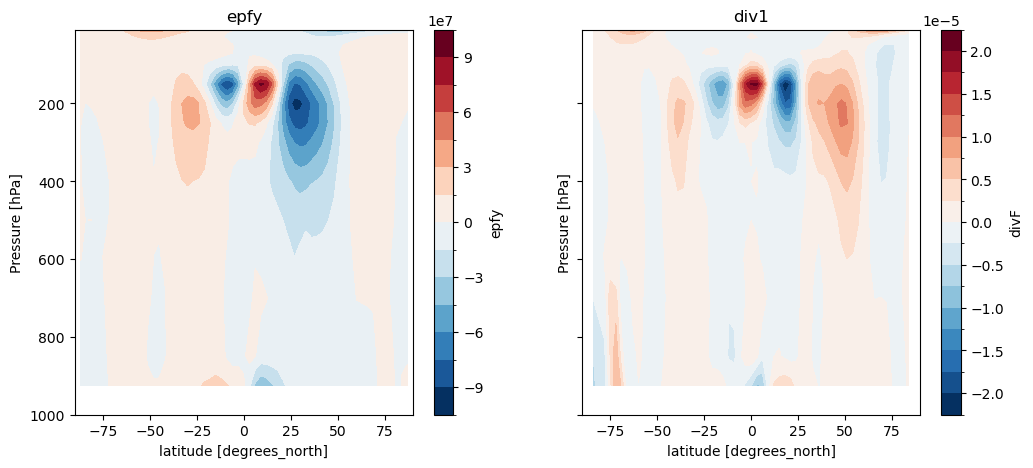

In [244]:
cesm1_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CESM1-WACCM-SC_ua_epfy_divF_r300_3x3_futArc.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
cesm1_efp = ef.calculate_efp_pamip(cesm1_ds, usual_mean=False)
cesm1_efp_south = ef.calculate_efp_pamip(cesm1_ds, calc_south_hemis=True, usual_mean=False)
model_cesm1='CESM1-WACCM-SC'
print(f'{model_cesm1} DJF Feedback: {cesm1_efp}')
print(f'{model_cesm1} JAS Feedback: {cesm1_efp_south}')

# plot original variables
cesm1_ds1 = cesm1_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
cesm1_ds1.epfy.mean('time').plot.contourf(ax=ax1, levels=20, yincrease=False)
cesm1_ds1.divF.mean('time').plot.contourf(ax=ax2, levels=20, yincrease=False)
ax1.set_title('epfy')
ax2.set_title('div1')
plt.show()

## Table pdSST-futArcSIC

- IPSL-CM6A-LR SH (JAS): 0.28 vs 0.22
- OpenIFS-159 NH (DJF): 0.32 vs 0.36
- OpenIFS-511 NH (DJF) : 0.37 vs 0.27

In [260]:
import pandas as pd

# Shortcuts for the models
# model_shortcut = ['can', 'cesm2', 'cnrm', 'e3sm', 'ecearth', 'awi', 'fgoals', 'hadll', 'hadmm',
#                   'ipsl', 'miroc', 'nor', 't159', 't511', 'cesm1']

model_shortcut = ['can', 'cesm2', 'cnrm', 'ecearth', 'fgoals', 'hadll', 'hadmm',
                  'ipsl', 'miroc', 'nor', 't159', 't511', 'cesm1']

# Initialize empty lists to store the full model names and feedbacks
model_list = []
efp_djf = []
efp_jas = []

# Populate the lists using the shortcuts
for shortcut in model_shortcut:
    model_list.append(globals()[f'model_{shortcut}'])
    efp_djf.append(globals()[f'{shortcut}_efp'])
    efp_jas.append(globals()[f'{shortcut}_efp_south'])

# Create the DataFrame
data = {
    'Model': model_list,
    'NH Feedback (DJF)': efp_djf,
    'SH Feedback (JAS)': efp_jas
}

df = pd.DataFrame(data)

df

,Model,NH Feedback (DJF),SH Feedback (JAS)
0,CanESM5,0.4255,0.4634
1,CESM2,0.3978,0.3548
2,CNRM-CM6-1,0.2733,0.2386
3,EC-EARTH3,0.3365,0.3480
4,FGOALS-f3-L,0.2621,0.1420
5,HadGEM3-GC31-LL,0.3018,0.3276
6,HadGEM3-GC31-MM,0.3616,0.3474
7,IPSL-CM6A-LR,0.3034,0.2895
8,MIROC6,0.2469,0.3547
9,NorESM2-LM,0.3354,0.3837


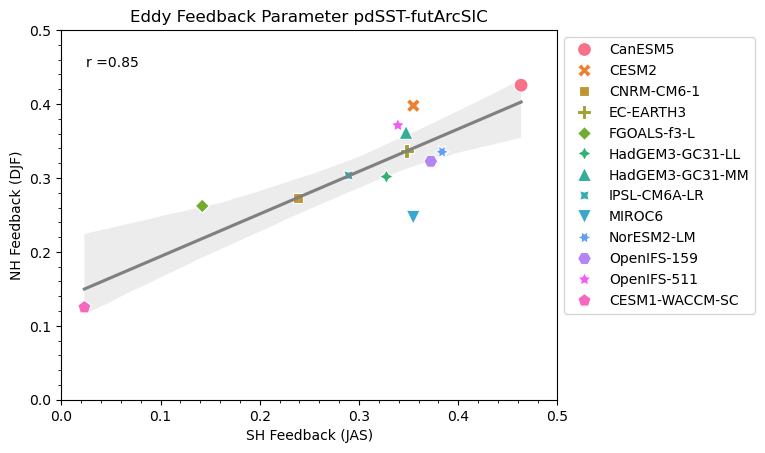

In [263]:
import seaborn as sns
import scipy as sp

sns.regplot(data=df, x='SH Feedback (JAS)', y='NH Feedback (DJF)', scatter_kws={'color': 'white'}, line_kws={"color": "gray"})
sns.scatterplot(data=df, x='SH Feedback (JAS)', y='NH Feedback (DJF)', hue='Model', style='Model', s=100)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=efp_jas, y=efp_djf)
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

plt.xlim([0,0.5])
plt.ylim([0,0.5])

plt.minorticks_on()
plt.legend(bbox_to_anchor=(1,1))
plt.title('Eddy Feedback Parameter pdSST-futArcSIC')
plt.show()

# Individual model dealings